In [2]:
import numpy as np
import matplotlib.pyplot as plt
# plt.style.use(['notebook'])

In [3]:
from spectralETD import spectralETD

ModuleNotFoundError: No module named 'spectralETD'

# Cahn-Hilliard equation in 3D

The free-energy is defined as 

$$ F[c] = \int_V dx \left[ \frac{\kappa}{2}\left(\nabla c\right)^2 +f(c) \right]$$

$$\frac{\partial \eta}{\partial t} = M \nabla^2 \left[ - \kappa \nabla^2 \eta + 2 W(\eta-3\eta^2+2\eta^3) \right] $$

In [4]:
# Cahn-Hilliard model constants
W = 1.0
M = 1.0 # mobility
kappa = 0.1 #gradient coeficient

In [5]:
def fbulk(c):
    return W*c**2*(1-c)**2

Text(0.5, 1.0, 'Bulk free energy density')

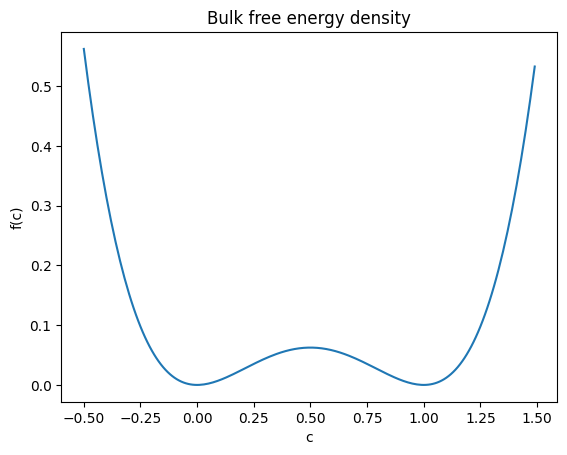

In [7]:
c = np.arange(-0.5, 1.5, 0.01)
f = fbulk(c)
plt.plot(c, f, label='f(c)')
plt.xlabel('c')
plt.ylabel('f(c)')
plt.title('Bulk free energy density')


In [6]:
CH = spectralETD(ndim=3,method='ETD',device='cuda')

Using dimensions: 3
Using method: ETD
Using device: cuda


In [7]:
L = 8*np.pi
Ngrid = 128
CH.Set_Geometry(lengths=L,gridsize=Ngrid)

In [8]:
# The linear terms of PDE
def Loperator_k(params):
    M,kappa,K2 = params
    return -M*kappa*K2**2

params = M,kappa,CH.K2
CH.Set_LinearOperator(Loperator_k,params)

In [9]:
# The non-linear terms of PDE (with dealising)
def Noperator_func(n,params):
    M,W,K2,fft = params
    return -2*M*W*K2*fft(n-3*n**2+2*n**3)

params = M,W,CH.K2,CH.fft
CH.Set_NonLinearOperator(Noperator_func,params)

In [10]:
CH.Set_TimeStep(h=0.01)

Using time step: 0.01


## Calculating the Dynamics

In [ ]:
T = 200.0 # total time

# Setting Initial condition
seed = 12345 # (random seed for reproducibility)
rng = np.random.default_rng(seed)
noise = 0.01
mean = 0.2
n0 = mean + noise*rng.standard_normal((CH.Ngrid[0],CH.Ngrid[1],CH.Ngrid[2]))  # initial condition
CH.Set_Field(n0) 

# Calculate the dynamics
# ti: initial time, tf: final time, print_every: how often to print progress
# The output is a tuple (t, n) where t is the time array and n is the field array
t, n = CH.Calculate_Dynamics(ti=0.0, tf=T, print_every=100) 

Step 100, Time: 1.00
Step 200, Time: 2.00
Step 300, Time: 3.00
Step 400, Time: 4.00
Step 500, Time: 5.00
Step 600, Time: 6.00
Step 700, Time: 7.00
Step 800, Time: 8.00
Step 900, Time: 9.00
Step 1000, Time: 10.00
Step 1100, Time: 11.00
Step 1200, Time: 12.00
Step 1300, Time: 13.00
Step 1400, Time: 14.00
Step 1500, Time: 15.00
Step 1600, Time: 16.00
Step 1700, Time: 17.00
Step 1800, Time: 18.00
Step 1900, Time: 19.00
Step 2000, Time: 20.00
Step 2100, Time: 21.00
Step 2200, Time: 22.00
Step 2300, Time: 23.00
Step 2400, Time: 24.00
Step 2500, Time: 25.00
Step 2600, Time: 26.00
Step 2700, Time: 27.00
Step 2800, Time: 28.00
Step 2900, Time: 29.00
Step 3000, Time: 30.00
Step 3100, Time: 31.00
Step 3200, Time: 32.00
Step 3300, Time: 33.00
Step 3400, Time: 34.00
Step 3500, Time: 35.00
Step 3600, Time: 36.00
Step 3700, Time: 37.00
Step 3800, Time: 38.00
Step 3900, Time: 39.00
Step 4000, Time: 40.00
Step 4100, Time: 41.00
Step 4200, Time: 42.00
Step 4300, Time: 43.00
Step 4400, Time: 44.00
Step 4

In [12]:
from volumerender import volumerender

(np.float64(-0.5), np.float64(255.5), np.float64(255.5), np.float64(-0.5))

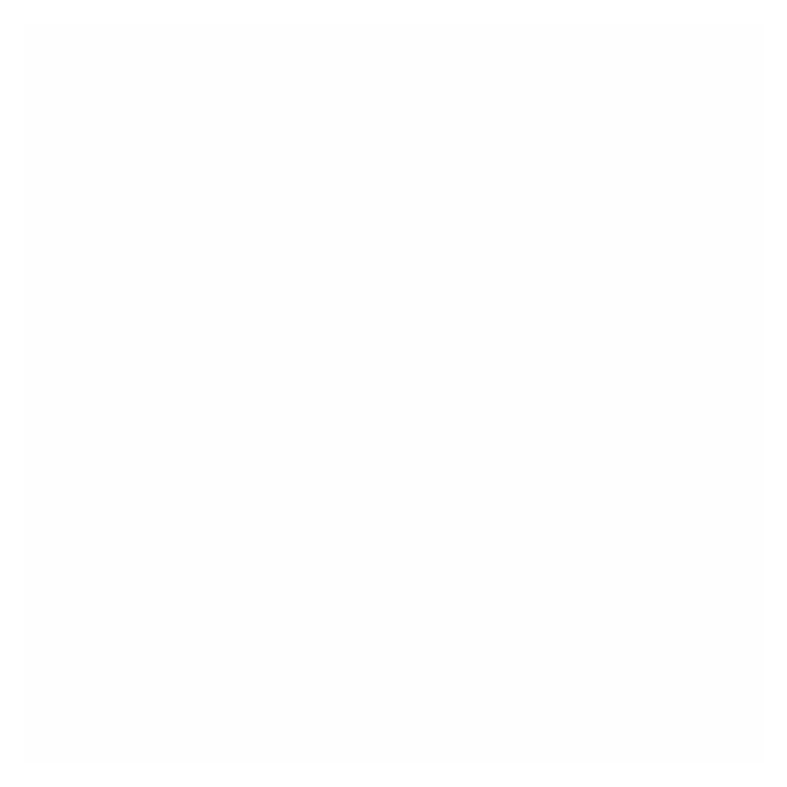

In [13]:
j=10
image1 = volumerender(CH.L, n[j], min_value = 0.5, max_value = 1.0)
plt.figure(figsize=(4,4), dpi=240)
plt.imshow(image1)
plt.axis('off')

([], [])

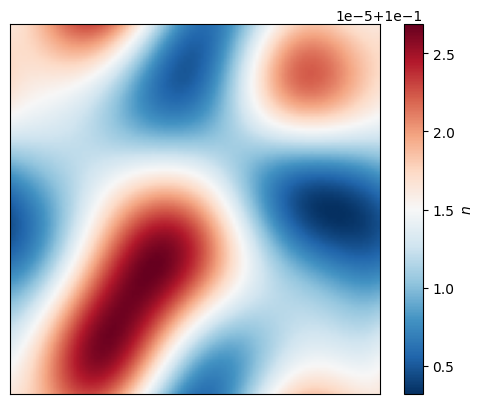

In [14]:
plt.imshow(n[j][:,0,:],cmap='RdBu_r')
plt.colorbar(label=r'$n$')
plt.xticks([])
plt.yticks([])
# plt.savefig('../../figuras/ch2d-profile-c0='+str(n0)+'-t='+str(j*dframes)+'-'+method+'.pdf')

(np.float64(-0.5), np.float64(255.5), np.float64(255.5), np.float64(-0.5))

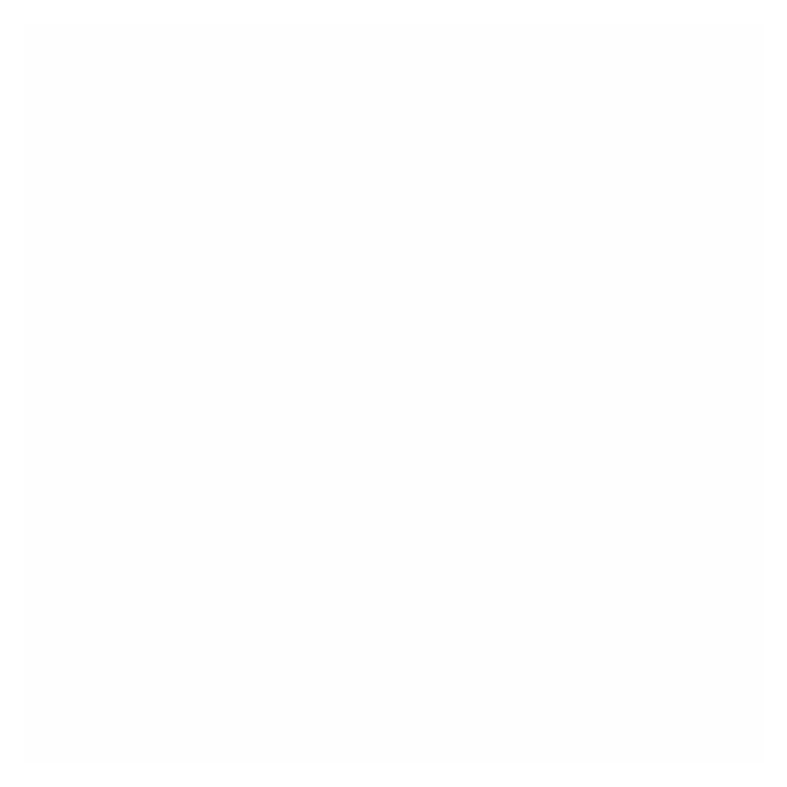

In [15]:
j=100
image2 = volumerender(CH.L, n[j], min_value = 0.5, max_value = 1.0)
plt.figure(figsize=(4,4), dpi=240)
plt.imshow(image2)
plt.axis('off')

([], [])

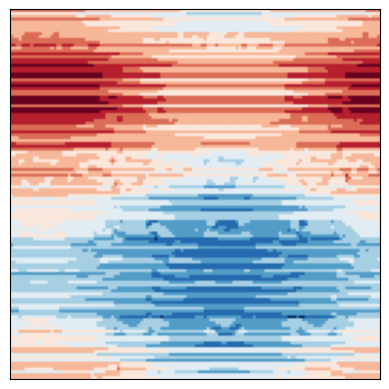

In [16]:
plt.imshow(n[j][:,0,:],cmap='RdBu_r')
# plt.colorbar(label=r'$n$')
plt.xticks([])
plt.yticks([])
# plt.savefig('../../figuras/ch2d-profile-c0='+str(n0)+'-t='+str(j*dframes)+'-'+method+'.pdf')

(np.float64(-0.5), np.float64(255.5), np.float64(255.5), np.float64(-0.5))

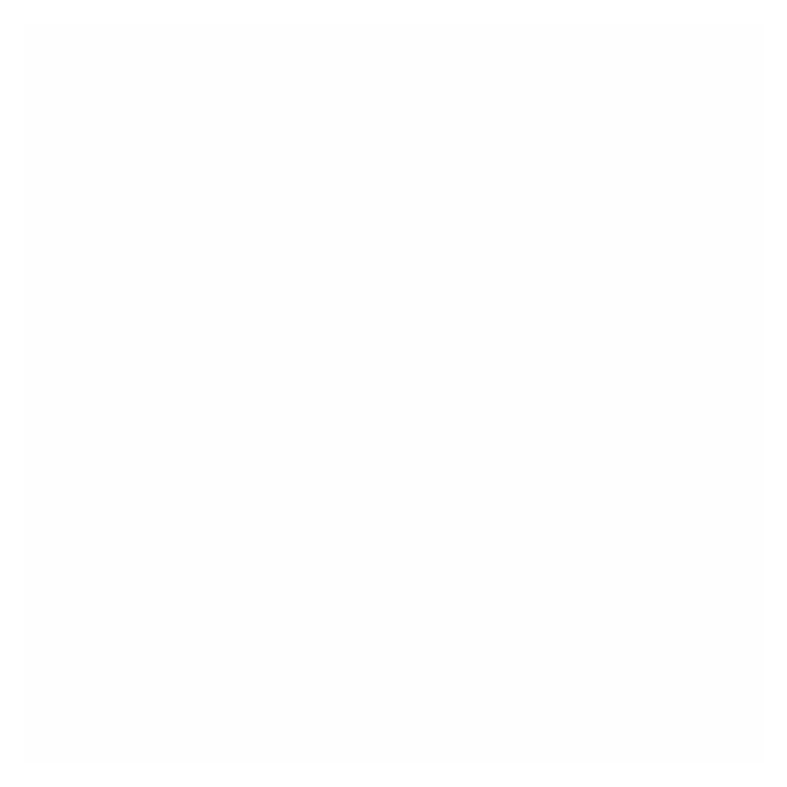

In [17]:
j=-1
image3 = volumerender(CH.L, n[j], min_value = 0.5, max_value = 1.0)
plt.figure(figsize=(4,4), dpi=240)
plt.imshow(image3)
plt.axis('off')

([], [])

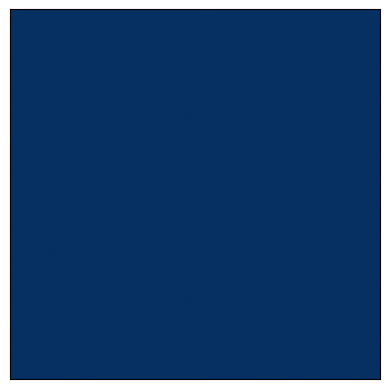

In [18]:
plt.imshow(n[j][:,0,:],cmap='RdBu_r')
# plt.colorbar(label=r'$n$')
plt.xticks([])
plt.yticks([])
# plt.savefig('../../figuras/ch2d-profile-c0='+str(n0)+'-t='+str(j*dframes)+'-'+method+'.pdf')

In [19]:
# # Saving the data of the profiles

# np.save('../../results/ch2d-c0='+str(n0)+'-first.npy',n[10])
# np.save('../../results/ch2d-c0='+str(n0)+'-second.npy',n[100])
# np.save('../../results/ch2d-c0='+str(n0)+'-third.npy',n[750])
# np.save('../../results/ch2d-c0='+str(n0)+'-last.npy',n[-1])

# Testing Convergence

In [20]:
print(n[0].mean(),n[-1].mean())

0.10000987 0.10000991


In [21]:
error= np.abs(np.mean(n[0])-np.mean(n,axis=(1,2,3)))

In [22]:
# np.save('../../results/conservation-CH-'+method+'.npy',[t,error])

(1e-16, 0.001)

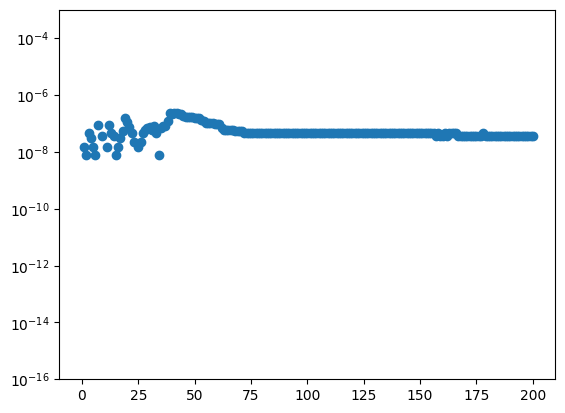

In [23]:
plt.yscale('log')
plt.scatter(t,error)
plt.ylim(1e-16,1e-3)

# Free-energy calculation

In [24]:
F = np.zeros_like(t)

for i in range(t.size):
    CH.Set_Field(n[i])
    nablacx = CH.ifft(1.0j*CH.Kx*CH.n_k).real.cpu().numpy()
    nablacy = CH.ifft(1.0j*CH.Ky*CH.n_k).real.cpu().numpy()
    nablacz = CH.ifft(1.0j*CH.Kz*CH.n_k).real.cpu().numpy()
    nablac2 = nablacx**2+ nablacy**2+ nablacz**2
    F[i] = np.mean(0.5*kappa*nablac2+fbulk(n[i]))

In [25]:
# np.save('../../results/free-energy-CH-'+method+'.npy',[t,F])

/tmp/ipykernel_56946/4169747991.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax1.legend(loc='best')


[]

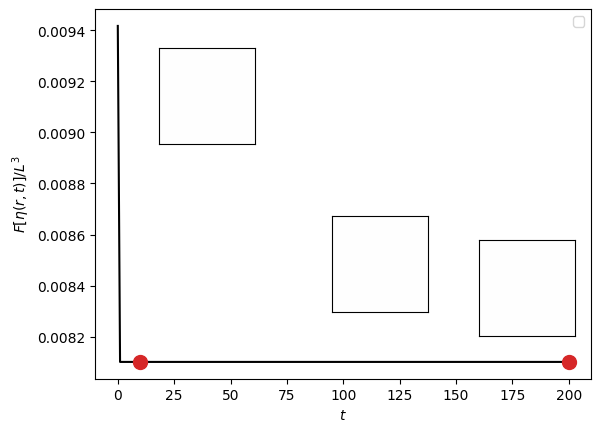

In [26]:
fig, ax1 = plt.subplots()
ax1.plot(t,F,'k')
ax1.scatter(t[10],F[10],s=100,color='C3',zorder=5)
# ax1.scatter(t[100],F[100],s=100,color='C3',zorder=5)
# ax1.scatter(t[1000],F[1000],s=100,color='C3',zorder=5)
ax1.scatter(t[-1],F[-1],s=100,color='C3',zorder=5)
ax1.legend(loc='best')
ax1.set_xlabel(r'$t$')
ax1.set_ylabel(r'$F[\eta(r,t)]/L^3$')

ax2 = fig.add_axes([0.7, 0.2, 0.2, 0.2])
ax2.imshow(image3)
# ax2.arrow(0.01,3000,0.1,100)
ax2.set_xticks([])
ax2.set_yticks([])

ax3 = fig.add_axes([0.47, 0.25, 0.2, 0.2])
ax3.imshow(image2)
# ax2.arrow(0.01,3000,0.1,100)
ax3.set_xticks([])
ax3.set_yticks([])

ax5 = fig.add_axes([0.2, 0.6, 0.2, 0.2])
ax5.imshow(image1)
# ax2.arrow(0.01,3000,0.1,100)
ax5.set_xticks([])
ax5.set_yticks([])

# Make a animation

In [27]:
# from matplotlib import animation
# from matplotlib.animation import PillowWriter

# fig, ax = plt.subplots(1,1,figsize=(8,8))
# im = ax.imshow(n[0],cmap='RdBu_r', vmin=0.0, vmax=1.0)
# cb = fig.colorbar(im,ax=ax, label=r'$\eta(x,y)$', shrink=0.8)
# tx = ax.set_title(f't={t[0]:.0f}')
# ax.set_xticks([])
# ax.set_yticks([])

# def animate(i):
#     im.set_data(n[i]) # updating data
#     im.set_clim(0.0, 1.0)
#     tx.set_text(f't={t[i]:.0f}')  
#     return fig,

# ani = animation.FuncAnimation(fig, animate, frames= Nframes,
#                                interval = 50)
# writervideo = animation.FFMpegWriter(fps=Nframes/10) 
# ani.save('ch2d-c0='+str(n0)+'.mp4',writer=writervideo,dpi=200)